In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Add Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

# Read the ride data file and store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [3]:
# Get the columns and rows that are not null
city_data_df.count()
ride_data_df.count()
city_data_df.isnull().sum()
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [4]:
# Get the data types of each column
city_data_df.dtypes
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [5]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [6]:
# Get the number of data points from the Urban Cities
sum(city_data_df["type"] == "Urban")

66

In [7]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
# Create the Urban, Suburban, and Rural City DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [9]:
# Get the number of rides
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [10]:
# Get the average fare for each city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [11]:
# Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

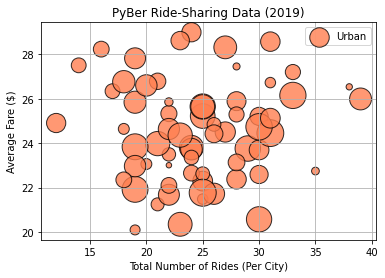

In [12]:
# Build the scatter plots for Urban cities
plt.scatter(urban_ride_count, urban_avg_fare, s = 10*urban_driver_count, c = "coral", edgecolor = "black", linewidths = 1, alpha = 0.8, label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

# Display the Scatter plot
plt.show()

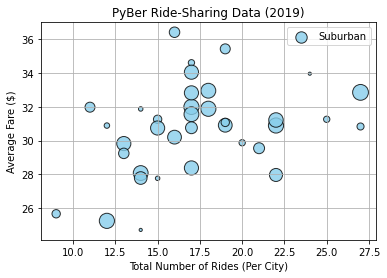

In [13]:
# Build the scatter plots for Suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, s = 10*suburban_driver_count, c = "skyblue", edgecolor = "black", linewidths = 1, alpha = 0.8, label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

# Display the Scatter plot
plt.show()

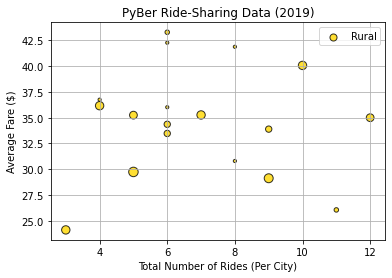

In [14]:
# Build the scatter plots for Rural cities
plt.scatter(rural_ride_count, rural_avg_fare, s = 10*rural_driver_count, c = "gold", edgecolor = "black", linewidths = 1, alpha = 0.8, label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend
plt.legend()

# Display the Scatter plot
plt.show()

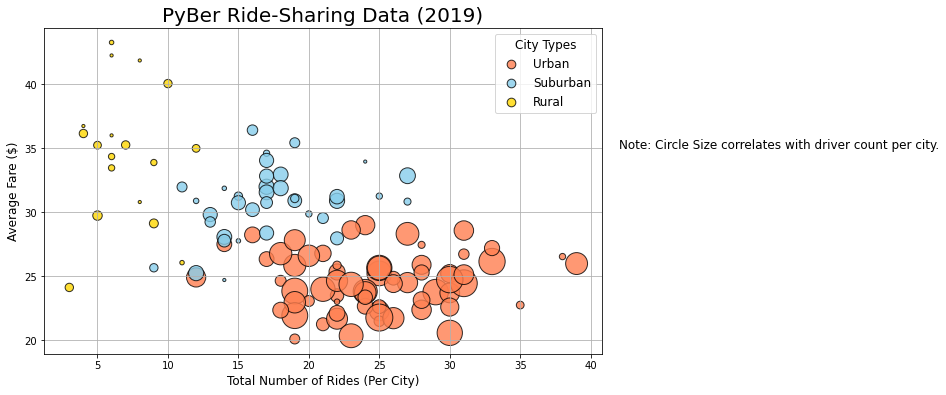

In [15]:
# Add the scatter charts for each type of city
plt.subplots(figsize = (10, 6))
plt.scatter(urban_ride_count, urban_avg_fare, s = 10*urban_driver_count, c = "coral", edgecolor = "black", linewidths = 1, alpha = 0.8, label = "Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, s = 10*suburban_driver_count, c = "skyblue", edgecolor = "black", linewidths = 1, alpha = 0.8, label = "Suburban")
plt.scatter(rural_ride_count, rural_avg_fare, s = 10*rural_driver_count, c = "gold", edgecolor = "black", linewidths = 1, alpha = 0.8, label = "Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)

# Add the legend
lgnd = plt.legend(fontsize = "12", mode = "Expanded", scatterpoints = 1, loc = "best", title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle Size correlates with driver count per city.", fontsize = "12")

# Save the figure
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()

In [16]:
# Get summary statistics
urban_cities_df.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [17]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [18]:
# Calculate the median of the ride count for each city type
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [19]:
# Calculate the mode of the ride count for urban cities
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [20]:
# Import NumPy and the stats module from SciPy
import numpy as np
import scipy.stats as sts

In [21]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [22]:
# Calculate the measures of central tendency for the ride count for the suburban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count:.2f}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.00.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [23]:
# Calculate the measures of central tendency for the ride count for the rural cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count:.2f}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.00.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [24]:
# Get the fares for the cities
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [25]:
# Calculate the measures of central tendency for the average fare for the urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare prices for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare prices for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare prices for urban trips is ${mode_urban_fares}.")

The mean fare prices for urban trips is $24.53.
The median fare prices for urban trips is $24.64.
The mode fare prices for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [26]:
# Calculate the measures of central tendency for the average fare for the suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare prices for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare prices for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare prices for suburban trips is ${mode_suburban_fares}.")

The mean fare prices for suburban trips is $30.97.
The median fare prices for suburban trips is $30.75.
The mode fare prices for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [27]:
# Calculate the measures of central tendency for the average fare for the rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare prices for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare prices for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare prices for rural trips is ${mode_rural_fares}.")

The mean fare prices for rural trips is $34.62.
The median fare prices for rural trips is $37.05.
The mode fare prices for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [28]:
# Get the driver count data from the cities
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

In [29]:
# Calculate the measures of central tendency for the number of drivers for the urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban trips is {mean_urban_drivers:.1f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban trips is {median_urban_drivers:.1f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban trips is {mode_urban_drivers}.")

The mean number of drivers for urban trips is 36.7.
The median number of drivers for urban trips is 37.0.
The mode number of drivers for urban trips is ModeResult(mode=array([39]), count=array([86])).


In [30]:
# Calculate the measures of central tendency for the number of drivers for the suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban trips is {mean_suburban_drivers:.1f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban trips is {median_suburban_drivers:.1f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban trips is {mode_suburban_drivers}.")

The mean number of drivers for suburban trips is 13.7.
The median number of drivers for suburban trips is 16.0.
The mode number of drivers for suburban trips is ModeResult(mode=array([20]), count=array([79])).


In [31]:
# Calculate the measures of central tendency for the number of drivers for the rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural trips is {mean_rural_drivers:.1f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural trips is {median_rural_drivers:.1f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural trips is {mode_rural_drivers}.")

The mean number of drivers for rural trips is 4.3.
The median number of drivers for rural trips is 4.0.
The mode number of drivers for rural trips is ModeResult(mode=array([1]), count=array([32])).


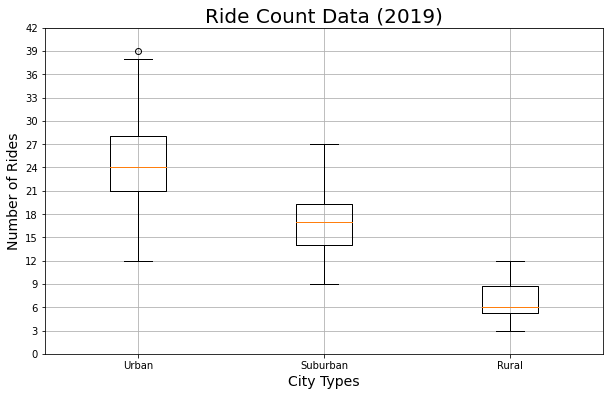

In [32]:
# Add all ride count box-and-whisker plots to the same graph for ride count
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title("Ride Count Data (2019)", fontsize = 20)
ax.set_ylabel("Number of Rides", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0, 45, step = 3.0))
ax.grid()
# Save the Figure
plt.savefig("analysis/Fig2.png")
plt.show()

In [33]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


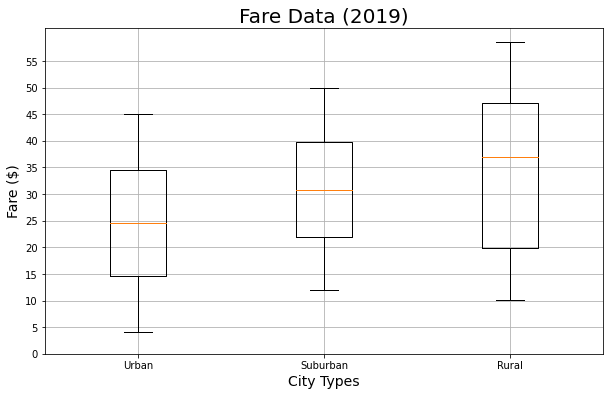

In [34]:
# Add all ride count box-and-whisker plots to the same graph for urban fare data
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title("Fare Data (2019)", fontsize = 20)
ax.set_ylabel("Fare ($)", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.boxplot(ride_fare_data, labels = x_labels)
ax.set_yticks(np.arange(0, 60, step = 5.0))
ax.grid()
# Save the Figure
plt.savefig("analysis/Fig3.png")
plt.show()

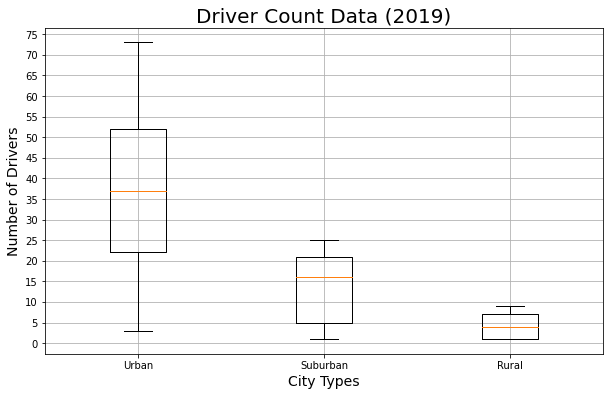

In [35]:
# Add all ride count box-and-whisker plots to the same graph for driver count data
x_labels = ["Urban", "Suburban", "Rural"]
ride_driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title("Driver Count Data (2019)", fontsize = 20)
ax.set_ylabel("Number of Drivers", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.boxplot(ride_driver_data, labels = x_labels)
ax.set_yticks(np.arange(0, 80, step = 5.0))
ax.grid()
# Save the Figure
plt.savefig("analysis/Fig4.png")
plt.show()

In [40]:
# Calculate the percentage of fare for each city type
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

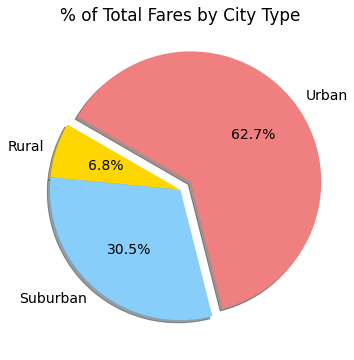

In [45]:
# Import mpl to change the plot configurations using rcParams
import matplotlib as mpl

# Build the percentage of fares by city type pie chart
plt.subplots(figsize = (10, 6))
plt.pie(type_percents, labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode = [0, 0, 0.1],
       autopct = '%1.1f%%',
       shadow = True, startangle = 150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("analysis/Fig5.png")

# Show Figure
plt.show()